In [3]:
import numpy as np
import random 
from time import time
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
def carte_mid_point(taille, alea_in = 0):
    #initialisation de la carte de hauteur
    # aveç les quatres sommets du carrée initial  
    res = [[0]*taille for i in range(taille)]
    
    res[0][0] = random.randint(-alea_in, alea_in)
    res[0][taille-1] = random.randint(-alea_in, alea_in)
    res[taille-1][0] = random.randint(-alea_in, alea_in)
    res[taille-1][taille-1] = random.randint(-alea_in, alea_in)

    #Initialisation de la file 
    file = deque()
    file.append((0, 0, taille-1, taille-1, alea_in))
    
    while(file):
        #Calcul des coord des médians de chaque coté et du centre 
        xg, yg, xd, yd, alea = file.popleft()
        xc, yc = (xg+xd)//2,  (yg+yd)//2

        # Affectation des hauteurs aux points médians et du centre 
        res[xc][yc] = (res[xg][yg] + res[xg][yd] \
                       + res[xd][yd] + res[xd][yg]) // 4 + random.randint(-alea, alea)
        res[xc][yg] = (res[xg][yg] + res[xd][yg]) // 2 + random.randint(-alea, alea)
        res[xc][yd] = (res[xg][yd] + res[xd][yd]) // 2 + random.randint(-alea, alea)
        res[xg][yc] = (res[xg][yg] + res[xg][yd]) // 2 + random.randint(-alea, alea)
        res[xd][yc] = (res[xd][yd] + res[xd][yg]) // 2 + random.randint(-alea, alea)

        #Ajout des carrées decouverts à la file
        if xc - xg > 1:
            file.append((xg, yg, xc, yc, alea//2))
            file.append((xc, yc, xd, yd, alea//2))
            file.append((xg, yc, xc, yd, alea//2))
            file.append((xc, yg, xd, yc, alea//2))

    return np.array(res)

In [5]:
def lerp(x, a, b):
    return x*(b-a)+a

def smooth_step(t):
    return t * t * t * (10 + t*(6*t - 15))

def perlin_2d(x, y, grad):
    #Coordonnées du sommet inf-gauche de la cellule actuelle
    N = len(grad)-1
    X, Y = int(x)%N, int(y)%N
    
    #coordonnées relatives à la cellule actuelle
    dx = x-X
    dy = y-Y

    #Produits scalaires:
    ll = dx * np.cos(grad[X,Y]) + dy * np.sin(grad[X,Y])
    lr = (dx-1) * np.cos(grad[X+1,Y]) + dy * np.sin(grad[X+1,Y])
    ul = dx * np.cos(grad[X,Y+1]) + (dy-1) * np.sin(grad[X,Y+1])
    ur = (dx-1) * np.cos(grad[X+1,Y+1]) + (dy-1) * np.sin(grad[X+1,Y+1])

    #Prioriser le poids des sommets proches par smooth_step    
    dx = smooth_step(dx)
    dy = smooth_step(dy)

    #Interpolation et Combinaison des valeurs
    n1 = lerp(dx, ll, lr)
    n2 = lerp(dx, ul, ur)
    return lerp(dy, n1, n2)

def carte_bruit_perlin(N, octaves, lacunarite=2, persistance=.5, ampl_i=200, freq_i=2):
    grad = np.random.uniform(0, 2*np.pi, size=(N, N))

    resultat = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            v = 0
            freq, ampl = freq_i, ampl_i
            for k in range(octaves):
                v += perlin_2d(freq*i/N, freq*j/N, grad) * ampl
                freq *= lacunarite
                ampl *= persistance
            resultat[i, j] = v
            
    return resultat

In [6]:
def visualiser_carte(carte_hauteur):
    # Création d'une palette couleur personnalisé
    colors = [
        (0, 0, 0.5),     # Ocean - bleu
        (0, 0, 1),       # Ocean - blue claire
        (0, 0.5, 0),     # Collines - vert sombre
        (0, 1, 0),       # plateury - vert
        (0.5, 0.5, 0),   # Vallés - Marron
        (1, 1, 1)        # Mountagnes - Blanc
    ]

    _cmap = mcolors.LinearSegmentedColormap.from_list('terrain_map', colors, N=25)

    fig, ax = plt.subplots()
    im = ax.imshow(carte_hauteur, cmap=_cmap)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Hauteur')

    plt.show()

In [8]:
import timeit

def generer_carte_perlin(taille, oct):
    visualiser_carte(carte_bruit_perlin(taille, oct))
def generer_carte_midPt(taille):
    visualiser_carte(carte_bruit_perlin(taille, 1))

tests_results_perlin_oct1 = []
tests_results_perlin_oct5 = []
tests_results_midPt = []

tailles = [2**(3+n)+ 1 for n in range(9)]

# for taille in tailles:
#     tests_results_perlin_oct1.append((taille, timeit.timeit(f'generer_carte_perlin({taille}, {1})', setup='from __main__ import generer_carte_perlin', number=4)))
#     tests_results_perlin_oct5.append((taille, timeit.timeit(f'generer_carte_perlin({taille}, {5})', setup='from __main__ import generer_carte_perlin', number=4)))
#     tests_results_midPt.append((taille, timeit.timeit(f'generer_carte_midPt({taille})', setup='from __main__ import generer_carte_midPt', number=4)))
#     print(taille)
    
print('Perlin (1x octave):\n', tests_results_perlin_oct1)
print('Perlin (5x octave):\n', tests_results_perlin_oct5)
print('MidPtDsp          :\n', tests_results_midPt)


Perlin (1x octave):
 []
Perlin (5x octave):
 []
MidPtDsp          :
 []


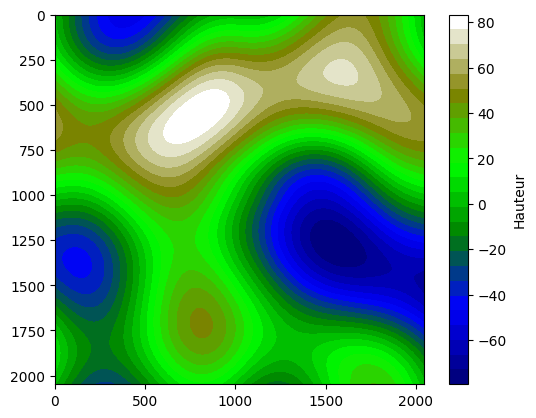

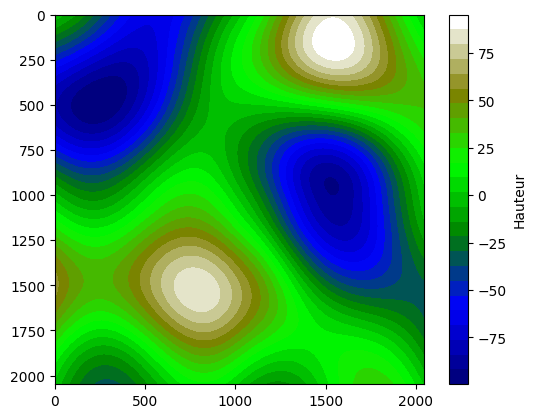

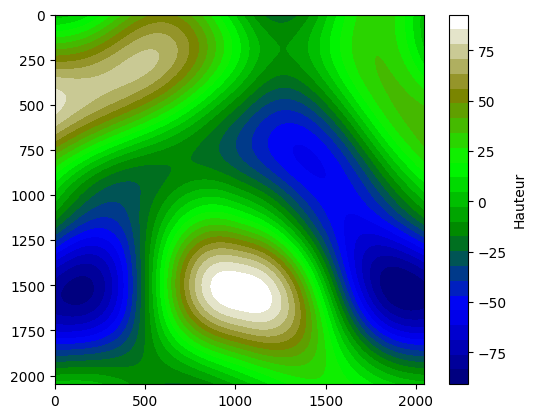

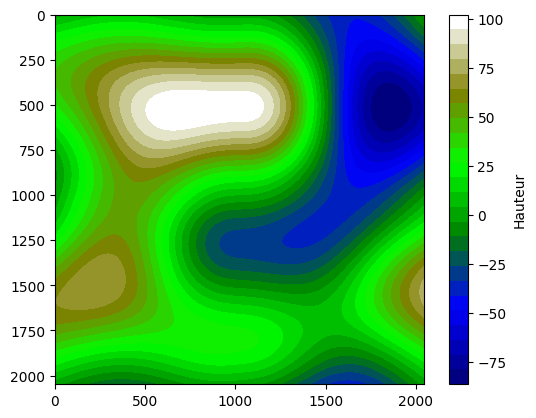

148.3683434999839


In [17]:
print(timeit.timeit(f'generer_carte_perlin({2049}, {1})', setup='from __main__ import generer_carte_perlin', number=4))